In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

from module import glass_angular_property as gap

# ガラスの斜入射特性を計算するモジュール

## 1. Functions  

垂直入射時のガラスの日射透過率及び日射反射率から任意の入射角におけるガラスの日射透過率及び日射反射率を計算する。

### 入力値  

$ \tau_{0,f} $ ：ガラスの正面側からの入射光に対する垂直入射時の日射透過率  
$ \tau_{0,b} $ ：ガラスの背面側からの入射光に対する垂直入射時の日射透過率  
$ \rho_{0,f} $ ：ガラスの正面側からの入射光に対する垂直入射時の日射反射率  
$ \rho_{0,b} $ ：ガラスの背面側からの入射光に対する垂直入射時の日射反射率  
$ \phi $       ：日射の入射角（°）  
gtype          ：ガラスの種類flag（0：透明フロート板ガラス、1：Low-Eガラス）  
ctypef         ：正面側の膜の有無flag（0：膜なし、1：膜あり）  
ctypeb         ：背面側の膜の有無flag（0：膜なし、1：膜あり）  

### 出力値

$ \tau_{\phi,f} $ ：ガラスの正面側からの入射光に対する入射角$\phi$の日射透過率  
$ \tau_{\phi,b} $ ：ガラスの背面側からの入射光に対する入射角$\phi$の日射透過率  
$ \rho_{\phi,f} $ ：ガラスの正面側からの入射光に対する入射角$\phi$の日射反射率  
$ \rho_{\phi,b} $ ：ガラスの背面側からの入射光に対する入射角$\phi$の日射反射率

### 計算方法

#### データ構造と値の範囲

$\tau_{0,f}$・$\tau_{0,b}$・$\rho_{0,f}$・$\rho_{0,b}$・gtype・ctypef・ctypebの組み合わせをクラス『glass＿input』と定義する。  
全ての値は0.0以上1.0以下の値をとる。  
$\tau_{0,f}$ と $\rho_{0,f}$ の合計は1.0を超えない。  
$\tau_{0,b}$ と $\rho_{0,b}$ の合計は1.0を超えない。   

#### 入射角$\phi$の日射透過率及び日射反射率の計算  

入射角によって日射特性が変化するガラスの日射透過率及び日射反射率の計算方法を以下に示す。  

（参考：JIS A 2103：2014 附属書G 斜入射に対する板ガラスの光学特性の計算方法） 

$$
\begin{eqnarray}
 &\displaystyle \tau_{\phi,f} = \tau_{0,f} \cdot \sum_{i=0}^5 m_{i} \cdot \cos^i\phi& \qquad\qquad\text{(1)} \nonumber\\
 \nonumber \\
 &\displaystyle \tau_{\phi,b} = \tau_{0,b} \cdot \sum_{i=0}^5 m_{i} \cdot \cos^i\phi& \qquad\qquad\text{(2)} \nonumber\\
 \nonumber \\
 &\displaystyle \rho_{\phi,f} =\rho_{0,f}+(1-\rho_{0,f}) \cdot \sum_{i=0}^5 m_{i} \cdot \cos^i\phi& \qquad\qquad\text{(3)} \nonumber\\
 \nonumber \\
 &\displaystyle \rho_{\phi,b} =\rho_{0,b}+(1-\rho_{0,b}) \cdot \sum_{i=0}^5 m_{i} \cdot \cos^i\phi& \qquad\qquad\text{(4)} \nonumber 
\end{eqnarray}
$$

ここで、  

$ m_{i} $ ：ガラス種類ごとの係数  

である。

$ m_{i} $ の係数表を以下に示す（参考：JIS A 2103：2014 表G.1）。なお、本仕様書では透明フロート板ガラス及びLow-Eガラスのみプログラムを記述する。  

| 板ガラス品種分類              | 規準化透過率又は規準化反射率 | $m_0$ | $m_1$ | $m_2$ | $m_3$ | $m_4$ | $m_5$ |
| :---                      | :---                         | ---: | ---: | ---: | ---: | ---: | ---: |
| 透明フロート板ガラス            | 規準化透過率                 | 0.000 | 2.552 | 1.364 | -11.388 | 13.617 | -5.146 |
|                               | 規準化反射率(ガラス面)       | 1.000 | -5.189 | 12.392 | -16.593 | 11.851 | -3.461 |
| 熱線吸収板ガラス              | 規準化透過率                 | 0.000 | 1.760 | 3.770 | -14.901 | 16.422 | -6.052 |
|                               | 規準化反射率(ガラス面)       | 1.000 | -5.189 | 12.392 | -16.593 | 11.851 | -3.461 |
| 熱線反射ガラス                | 規準化透過率                 | 0.000 | 3.297 | -1.122 | -8.408 | 12.206 | -4.972 |
|                               | 規準化反射率(ガラス面)       | 1.000 | -5.842 | 15.264 | -21.642 | 15.948 | -4.727 |
|                               | 規準化反射率(膜面)           | 1.000 | -5.842 | 15.264 | -21.642 | 15.948 | -4.727 |
| 熱線吸収熱線反射ガラス        | 規準化透過率                 | 0.000 | 2.558 | 0.989 | -11.214 | 14.275 | -5.608 |
|                               | 規準化反射率(ガラス面)       | 1.000 | -5.842 | 15.264 | -21.642 | 15.948 | -4.727 |
|                               | 規準化反射率(膜面)           | 1.000 | -5.842 | 15.264 | -21.642 | 15.948 | -4.727 |
| 高性能熱線反射ガラスSシリーズ | 規準化透過率                 | 0.000 | 5.342 | -10.170 | 6.670 | 0.886 | -1.728 |
|                               | 規準化反射率(ガラス面)       | 1.000 | -6.459 | 18.722 | -28.982 | 22.804 | -7.085 |
|                               | 規準化反射率(膜面)           | 1.000 | -9.187 | 33.681 | -59.593 | 50.413 | -16.314 |
| 高性能熱線反射ガラスTシリーズ | 規準化透過率                 | 0.000 | 2.552 | 1.364 | -11.388 | 13.617 | -5.146 |
|                               | 規準化反射率(ガラス面)       | 1.000 | -5.782 | 14.816 | -20.567 | 14.862 | -4.331 |
|                               | 規準化反射率(膜面)           | 1.000 | -8.900 | 31.953 | -55.934 | 47.050 | -15.176 |
| Low-Eガラス                    | 規準化透過率                 | 0.000 | 2.273 | 1.631 | -10.358 | 11.769 | -4.316 |
|                               | 規準化反射率(ガラス面)       | 1.000 | -5.084 | 12.646 | -18.213 | 13.967 | -4.316 |
|                               | 規準化反射率(膜面)           | 1.000 | -4.387 | 9.175 | -11.152 | 7.416 | -2.052 |

#### Example

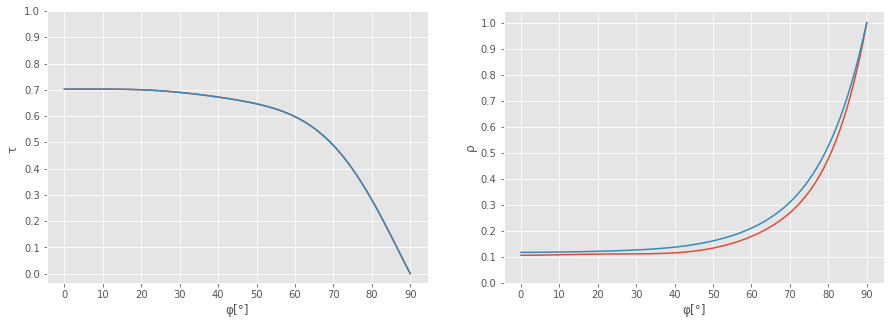

In [2]:
glass_result = np.zeros((5,91))

gl_in = gap.glass_input(0.703, 0.703, 0.106, 0.117, 1, 0, 1)

for j in range(0, 91):
    phi = j
    glass_result[0][j] = phi
    glass_result[1][j] = gap.glass_ang_prop(gl_in, phi)[0]
    glass_result[2][j] = gap.glass_ang_prop(gl_in, phi)[1]
    glass_result[3][j] = gap.glass_ang_prop(gl_in, phi)[2]
    glass_result[4][j] = gap.glass_ang_prop(gl_in, phi)[3]

#グラフの描画
graph_num = 2
ax = np.empty(graph_num, dtype = np.object)
fig = plt.figure(figsize = (15, 5 * ((graph_num + 1) // 2)))
plt.style.use('ggplot')

gpc = ['C0', 'C1']
gxd = [[glass_result[0][0:91], glass_result[0][0:91]], [glass_result[0][0:91], glass_result[0][0:91]]]
gyd = [[glass_result[1][0:91], glass_result[2][0:91]], [glass_result[3][0:91], glass_result[4][0:91]]]
gxl = 'φ[°]'
gyl = ['τ ', 'ρ']
gxt = [10 * i for i in range(10)]
gyt = [0.1 * i for i in range(11)]

for i in range(graph_num):   
    ax[i] = fig.add_subplot((graph_num + 1) // 2, 2, i + 1)
    for j in range(2):
        ax[i].plot(gxd[i][j], gyd[i][j], color = gpc[j])
    ax[i].set_xticks(gxt)
    ax[i].set_yticks(gyt)
    ax[i].set_xlabel(gxl, fontsize = 12)
    ax[i].set_ylabel(gyl[i], fontsize = 12)

plt.show()